In [22]:
from catenets.datasets import load
from src.iterpretability.synthetic_simulate import SyntheticSimulatorLinear
from src.iterpretability.datasets.data_loader import load
from src.iterpretability.utils import attribution_accuracy
import seaborn as sns
import pickle
import pandas as pd 

import numpy as np
from catenets.models.torch import TLearner, SLearner, TARNet, SNet
from src.iterpretability.explain import Explainer
from src.iterpretability.synthetic_experiment import PredictiveSensitivity

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from iterpretability.utils import (
    dataframe_line_plot,
)

In [23]:
seeds_list = [666, 25, 77, 55, 88, 99, 10, 2, 50]

result_names_to_average = ['All features ACC', 'Pred features ACC', 'Prog features ACC', 'PEHE', 'Factual RMSE', 'Normalized PEHE']

In [34]:
results_base_filename = '/Users/ibica/PycharmProjects/ITErpretability/results/predictive_scale_tcga_10_2_random_True_binary_False-seed'
results_df_base = pd.read_csv(results_base_filename + '42.csv', index_col=None)
for seed in seeds_list:
    results_filename = results_base_filename + str(seed) + '.csv'
    results_df = pd.read_csv(results_filename, index_col=None)
    results_df_base[result_names_to_average] += results_df[result_names_to_average]


results_df_base[result_names_to_average] /= len(seeds_list) + 1

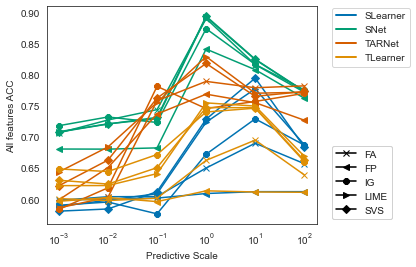

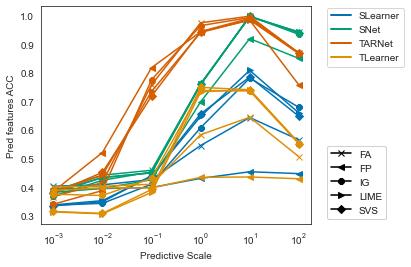

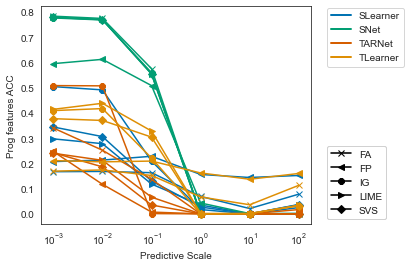

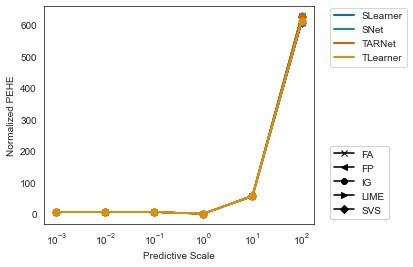

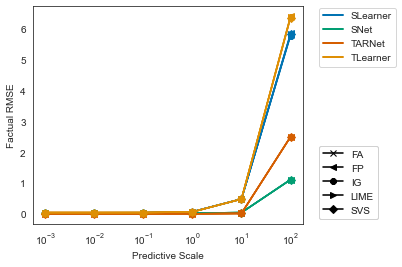

In [35]:
fig1 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'All features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig2 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Pred features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig3 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Prog features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig4 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Normalized PEHE',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)

fig5 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Factual RMSE',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)

In [27]:
results_base_filename = '/Users/ibica/PycharmProjects/ITErpretability/results/predictive_scale_tcga_10_2_random_True_binary_True-seed'
results_df_base = pd.read_csv(results_base_filename + '42.csv', index_col=None)
for seed in seeds_list:
    results_filename = results_base_filename + str(seed) + '.csv'
    results_df = pd.read_csv(results_filename, index_col=None)
    results_df_base[result_names_to_average] += results_df[result_names_to_average]


results_df_base[result_names_to_average] /= len(seeds_list) + 1

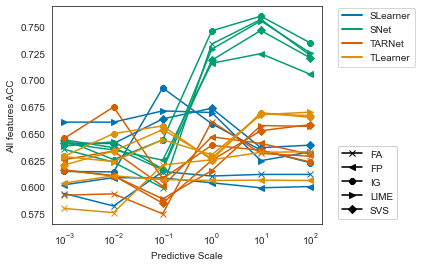

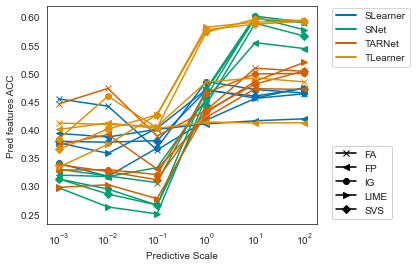

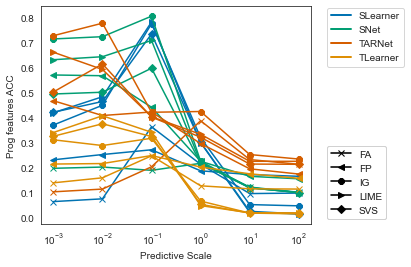

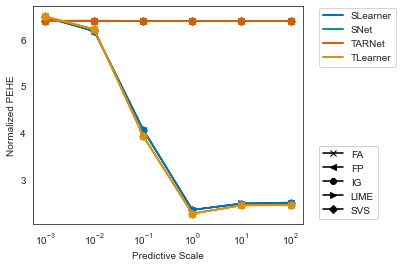

In [28]:
fig1 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'All features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig2 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Pred features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig3 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Prog features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig4 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Normalized PEHE',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)

In [29]:
results_base_filename = '/Users/ibica/PycharmProjects/ITErpretability/results/predictive_scale_tcga_100_10_random_True_binary_False-seed'
results_df_base = pd.read_csv(results_base_filename + '42.csv', index_col=None)
for seed in seeds_list:
    results_filename = results_base_filename + str(seed) + '.csv'
    results_df = pd.read_csv(results_filename, index_col=None)
    results_df_base[result_names_to_average] += results_df[result_names_to_average]


results_df_base[result_names_to_average] /= len(seeds_list)

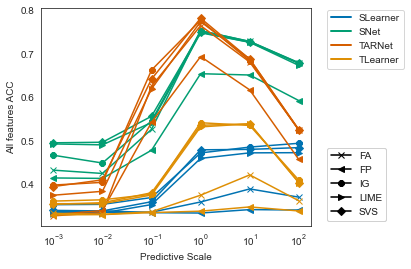

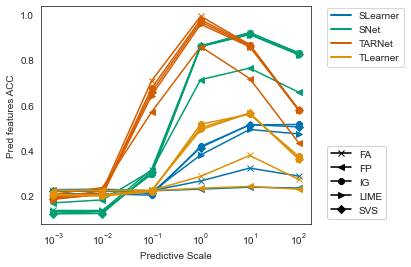

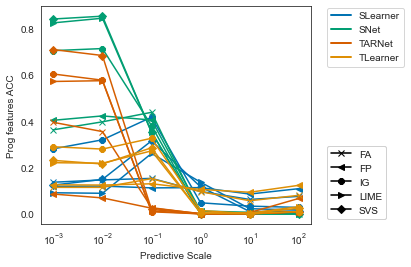

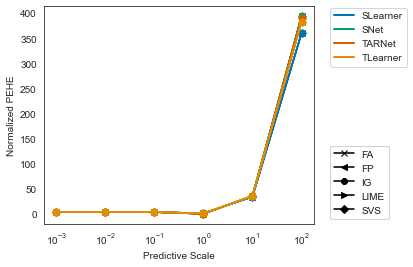

In [30]:
fig1 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'All features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig2 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Pred features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig3 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Prog features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig4 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Normalized PEHE',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)

In [31]:
results_base_filename = '/Users/ibica/PycharmProjects/ITErpretability/results/predictive_scale_tcga_100_10_random_True_binary_True-seed'
results_df_base = pd.read_csv(results_base_filename + '42.csv', index_col=None)
for seed in seeds_list:
    results_filename = results_base_filename + str(seed) + '.csv'
    results_df = pd.read_csv(results_filename, index_col=None)
    results_df_base[result_names_to_average] += results_df[result_names_to_average]


results_df_base[result_names_to_average] /= len(seeds_list) + 1 

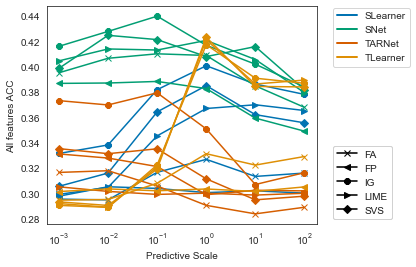

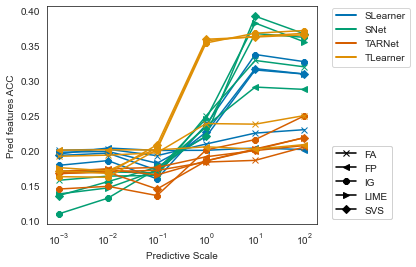

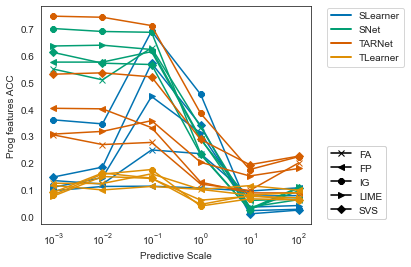

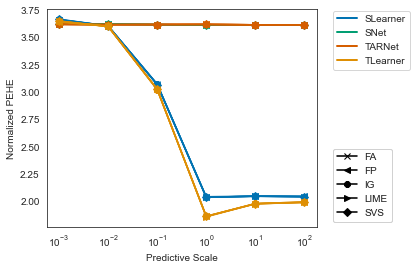

In [32]:
fig1 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'All features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig2 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Pred features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig3 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Prog features ACC',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)
fig4 = dataframe_line_plot(
    results_df_base,
    "Predictive Scale",
    'Normalized PEHE',
    np.unique(results_df_base['Explainer']),
    np.unique(results_df_base['Learner']),
)